ETF Exploration

In [3]:
#Package import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Dataset load
etf = pd.read_csv("Morningstar - European ETFs.csv")

etf.head()

,ticker,isin,fund_name,inception_date,category,rating,analyst_rating,risk_rating,performance_rating,investment_strategy,...,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down
0,0P00000C5S,CH0008899764,iShares SMI® ETF (CH),1999-10-06,Switzerland Equity,3.0,Negative,3.0,3.0,The Fund aims to achieve a return on your inve...,...,1.45,5.10,10.47,-4.09,4.18,-4.00,-3.96,10.56,15,8
1,0P00000FYY,SE0000693293,XACT OMXS30 UCITS ETF,2000-10-30,Sweden Equity,2.0,NaN,2.0,2.0,The fund is an exchange-traded index fund and ...,...,5.21,11.32,1.66,1.43,4.99,-6.15,-7.21,10.11,16,7
2,0P00000GCE,DE000A0H08N1,iShares STOXX Europe 600 Personal & Household ...,2002-07-08,Sector Equity Consumer Goods & Services,3.0,NaN,3.0,3.0,iShares STOXX Europe 600 Personal & Household ...,...,-1.51,5.34,8.17,6.48,4.83,4.12,-2.03,9.24,17,6
3,0P00000GF2,DE0006289465,iShares eb.rexx® Government Germany UCITS ETF ...,2003-02-04,EUR Government Bond,2.0,NaN,2.0,2.0,iShares eb.rexx Government Germany (DE) is an ...,...,-2.14,4.21,6.04,9.67,0.05,4.96,-3.72,-5.67,13,10
4,0P00000GKU,IE0032523478,iShares € Corp Bond Large Cap UCITS ETF EUR (D...,2003-03-17,EUR Corporate Bond,3.0,NaN,3.0,3.0,The investment objective of this Fund is to pr...,...,-2.74,5.58,6.26,10.55,1.38,3.78,-5.02,-5.84,16,7


In [7]:
#checking data types
etf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Columns: 132 entries, ticker to quarters_down
dtypes: float64(108), int64(2), object(22)
memory usage: 9.6+ MB


It appears that a lot of our columns use float64, which can be memory intensive. Glancing over the values in our dataset, it might be worthwhile to convert them to float32 to save memory. Although the memory usage isn't as intense as some other files, it helps to reduce it without sacrificing any serious precision, which could be a concern with live stock data but is something that isn't a concern with this particular dataset

In [9]:
#Memory reduction
float_cols = etf.select_dtypes(include=['float64']).columns
etf[float_cols] = etf[float_cols].astype('float32')

etf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Columns: 132 entries, ticker to quarters_down
dtypes: float32(108), int64(2), object(22)
memory usage: 5.7+ MB


In [11]:
#Descriptive Stats Exploration with some rating columns
rating_cols = ['risk_rating','performance_rating','average_credit_quality']
credit_rating_cols = ['credit_aaa','credit_aa','credit_a','credit_bbb','credit_bb','credit_b','credit_below_b']

etf[rating_cols].describe()

,risk_rating,performance_rating,average_credit_quality
count,5718.000000,5718.000000,1056.000000
mean,2.939489,3.266527,7.786932
std,0.990153,0.997961,4.237835
min,1.000000,1.000000,1.000000
25%,2.000000,3.000000,5.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,11.000000
max,5.000000,5.000000,15.000000


In [15]:
#Checking out the credit rating columns
etf[credit_rating_cols].describe()

,credit_aaa,credit_aa,credit_a,credit_bbb,credit_bb,credit_b,credit_below_b
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,27.341089,14.248296,19.594269,23.855192,8.368608,3.921534,1.727434
std,35.772308,16.943228,18.152332,21.490749,18.974676,8.929683,4.529949
min,-0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.710000,0.000000,0.000000,0.710000,0.000000,0.000000,0.000000
50%,6.010000,9.830000,17.385000,23.490000,0.000000,0.000000,0.000000
75%,43.000000,20.590000,33.730000,40.500000,1.925000,0.000000,0.000000
max,100.059998,99.940002,100.000000,99.870003,78.010002,33.529999,35.490002


In [17]:
# Identifying quarterly return columns for further analysis
quarterly_return_cols = [col for col in etf.columns if '_q' in col]
#quarterly_return_cols_2 = quarterly_return_cols.drop(['average_credit_quality'],axis=1)

# Display descriptive statistics for quarterly returns
qrc2 = etf[quarterly_return_cols]
qrc3 = qrc2.drop(['average_credit_quality','bond_credit_quality'],axis=1)
quarterly_returns_stats = qrc3.describe()
quarterly_returns_stats

,fund_return_2020_q3,fund_return_2020_q2,fund_return_2020_q1,fund_return_2019_q4,fund_return_2019_q3,fund_return_2019_q2,fund_return_2019_q1,fund_return_2018_q4,fund_return_2018_q3,fund_return_2018_q2,...,fund_return_2017_q2,fund_return_2017_q1,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1
count,9413.000000,9174.000000,8962.000000,8718.000000,8483.000000,8192.000000,7681.000000,7306.000000,7116.000000,6759.000000,...,5760.000000,5648.000000,5474.000000,5376.000000,5146.000000,4960.000000,4781.000000,4627.000000,4490.000000,4309.000000
mean,1.322511,13.398571,-11.340569,-0.563014,2.085266,5.391210,5.330680,-6.061890,1.660429,3.770169,...,0.508210,3.648197,3.040190,7.152805,26.587221,4.987580,3.638243,-4.835645,-4.888070,4.138972
std,8.278560,12.621673,27.706568,6.094045,5.738395,5.109342,8.443548,12.675599,7.629064,9.158055,...,6.385742,6.831252,9.006166,6.987911,639.002014,9.700890,8.457581,9.473111,5.010546,10.792687
min,-94.209999,-98.080002,-94.599998,-69.430000,-68.330002,-89.989998,-95.510002,-95.699997,-96.150002,-95.059998,...,-78.320000,-67.559998,-55.150002,-72.459999,-61.209999,-44.490002,-49.459999,-67.470001,-28.660000,-57.860001
25%,-1.380000,6.922500,-21.700001,-4.220000,-0.460000,3.337500,0.780000,-12.460000,-0.110000,0.465000,...,-1.710000,0.200000,-1.440000,4.100000,4.300000,-0.082500,0.180000,-9.485000,-6.830000,-1.270000
50%,1.230000,14.295000,-13.965000,0.300000,1.940000,5.720000,6.620000,-7.760000,1.600000,4.250000,...,0.880000,4.260000,3.110000,7.630000,7.520000,4.025000,4.430000,-4.960000,-5.360000,6.330000
75%,4.640000,19.207500,-2.400000,2.500000,4.645000,7.310000,9.930000,0.590000,5.060000,7.930000,...,3.580000,7.170000,7.827500,10.940000,10.265000,8.882500,8.560000,0.875000,-2.652500,9.590000
max,403.820007,106.489998,771.809998,66.370003,154.690002,99.330002,71.419998,240.610001,56.430000,50.700001,...,83.650002,44.980000,65.559998,40.770000,30000.539062,81.650002,92.489998,56.009998,42.459999,96.739998


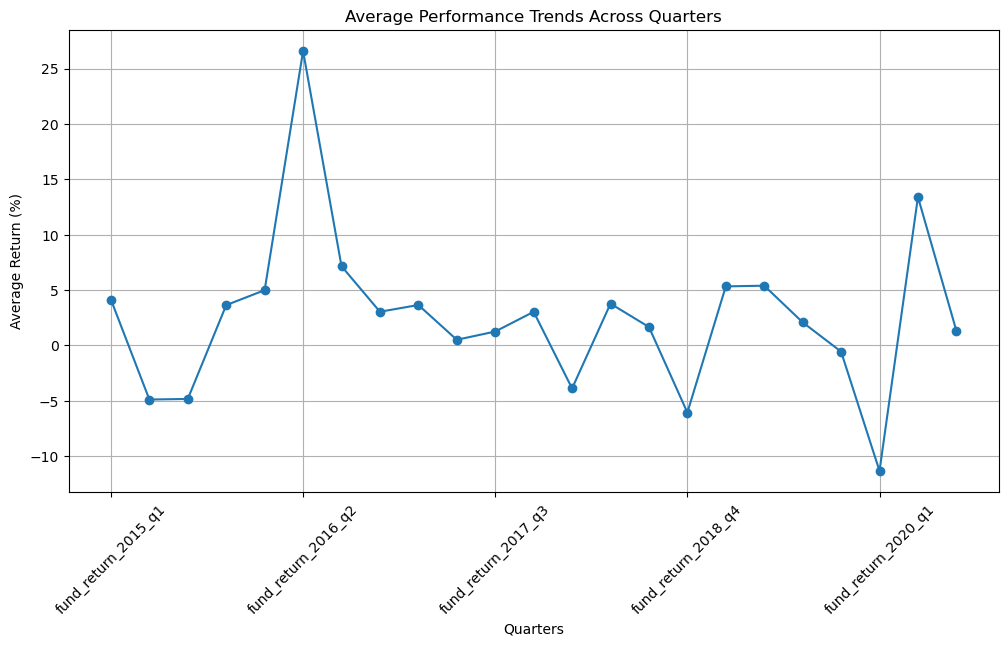

In [19]:
#Prepare data for trend visualization
trend_data = qrc3.mean().sort_index()

#Plot the trend
plt.figure(figsize=(12, 6))
trend_data.plot(marker='o', linestyle='-')
plt.title("Average Performance Trends Across Quarters")
plt.xlabel("Quarters")
plt.ylabel("Average Return (%)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Chart thoughts:
- The trend chart reveals any systematic patterns or seasonality in quarterly returns. 
- Peaks or troughs might align with market conditions or economic events during specific quarters.
- If some quarters consistently underperform or overperform, it may indicate specific time-bound factors impacting returns.

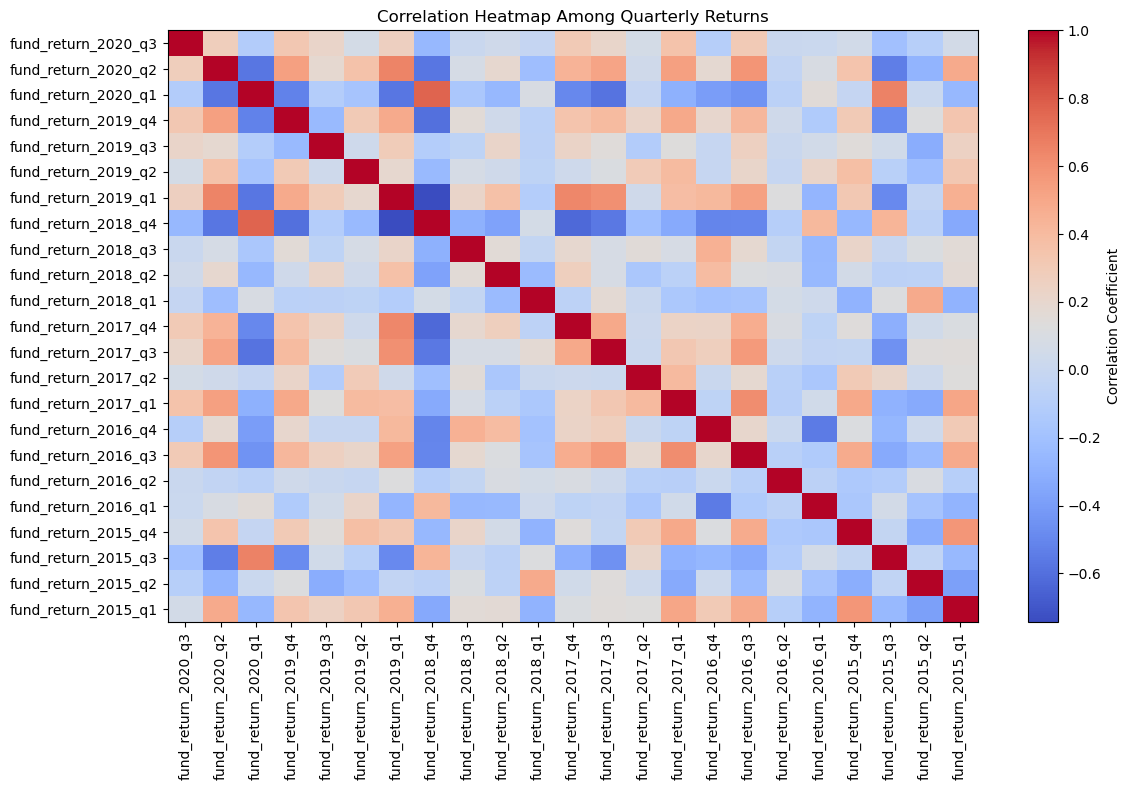

In [22]:
#Compute correlations among quarterly returns
correlation_matrix = qrc3.corr()

#Plot the heatmap of correlations
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.title("Correlation Heatmap Among Quarterly Returns")
plt.xticks(range(len(qrc3.columns)), qrc3.columns, rotation=90)
plt.yticks(range(len(qrc3.columns)), qrc3.columns)
plt.tight_layout()
plt.show()

Correlation heatmap insights
 - Strong Correlations: High correlations between adjacent quarters may suggest continuity in performance over time.
 - Weak Correlations or Negative Values: Periods with little to no correlation could indicate volatility or irregular market behavior. 
 - This could also result from disparate investment strategies among funds.

C:\Users\RyanMcKiernan\AppData\Local\Temp\ipykernel_19636\75924034.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


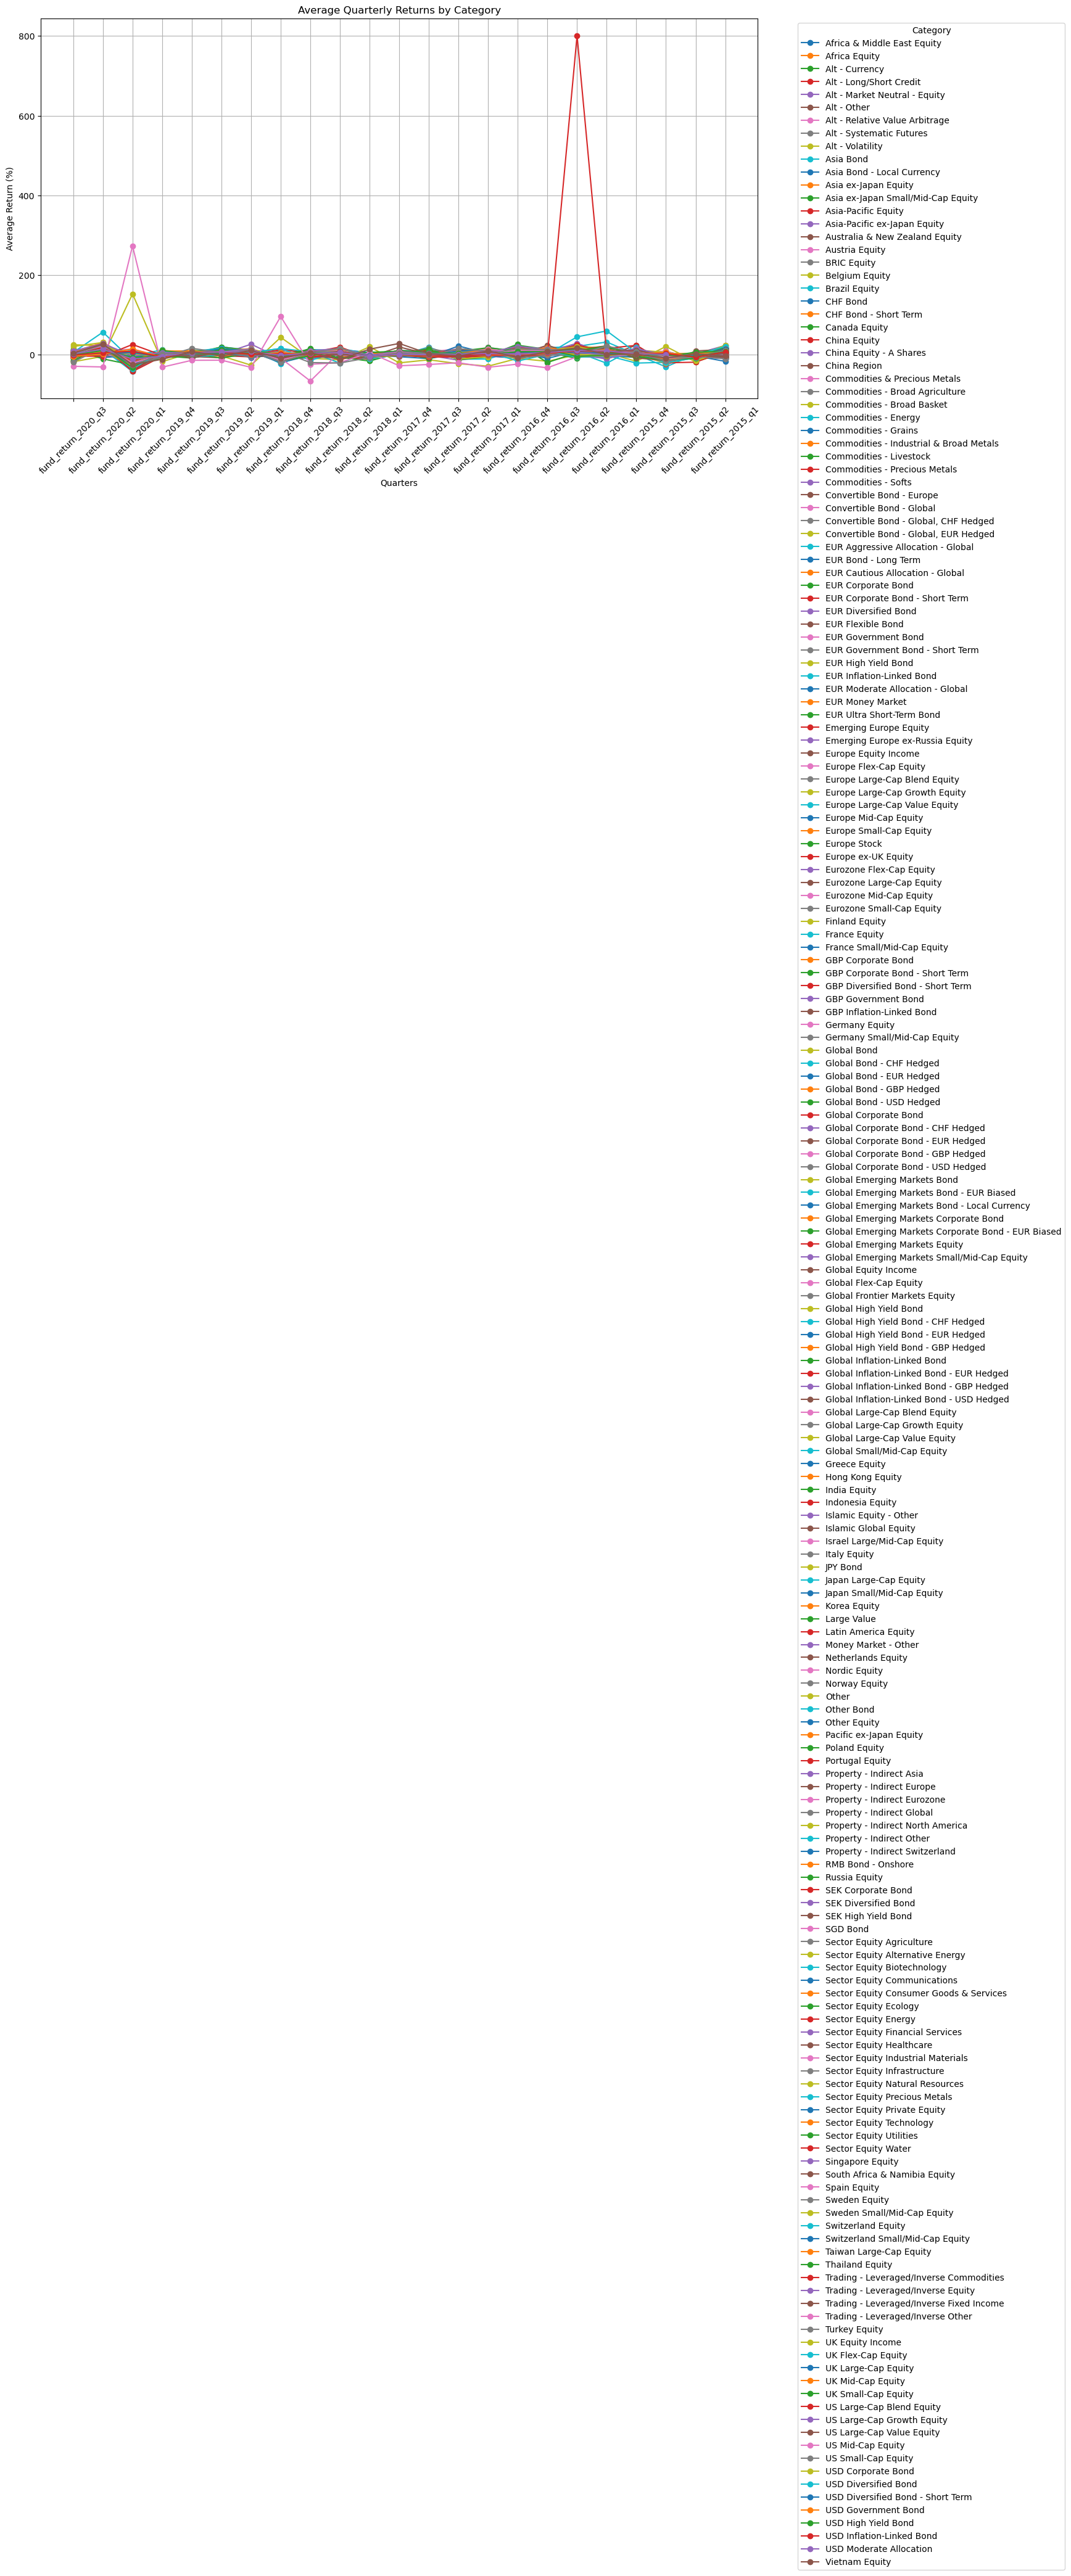

In [25]:
# While its nice to get a glimpse of things on the surface, it will help to analyze things by getting more specific.
# Let's take a look at some distributions within each category
# Group by 'category' and calculate average quarterly returns
category_group = etf.groupby('category')[qrc3.columns].mean()

# Visualize category-level average returns over quarters
category_trend = category_group.T

plt.figure(figsize=(15, 8))
for category in category_trend.columns:
    plt.plot(category_trend.index, category_trend[category], marker='o', linestyle='-', label=category)

plt.title("Average Quarterly Returns by Category")
plt.xlabel("Quarters")
plt.ylabel("Average Return (%)")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Category")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

On the surface, this is too crowded of a dataset to really interpret to the naked eye, but its worth noting that there are outliers that exist here and it may be valuable to know what those are.

The first one is in relation to the 2016 q3 spike that is upwards of 800%! That is to the Trading - Leveraged/Inverse Commodities category, and this may be linked to some market events that occured:
 - Oil Market Rebalancing: The World Bank's Commodity Markets Outlook in July 2016 noted that crude oil prices were projected to rise to 55 dollars per barrel in 2017, up from an average of 43 dollars per barrel in 2016, as the market continued to rebalance and OPEC was likely to limit output. 
 - Commodity Price Recovery: The S&P Goldman Sachs Commodity Index (GSCI) climbed 10.1% in 2016, indicating a recovery in commodity prices. 

There are some 2020 q2 points that stand out as well, those are related to:
 - COVID-19 Pandemic Impact: The onset of the COVID-19 pandemic led to unprecedented volatility in commodity markets. However, by Q2 2020, there was a notable rebound. The S&P Risk Parity Indices reported that the positive performance in the second quarter of 2020 was driven by commodities and equities, up 3.6% and 7.3%, respectively. 

 - Base Metals Recovery: Base metals experienced a significant recovery in Q2 2020, with the sector rising 12.88% after a 17.09% decline in Q1. LME copper, for instance, rose 25.61% during this quarter. 

While there are some market trends to this, lets dive in further to see if there's anything else to analyze

In [28]:
funds_q2_2016 = etf.loc[
    (etf['category'] == "Trading - Leveraged/Inverse Commodities") &
    (etf['fund_return_2016_q2'] > 0),  # Focus on positive performers
    ['ticker', 'fund_name', 'fund_return_2016_q2', 'risk_rating', 'performance_rating']
]

# Q2 2020 - Broad Commodities Analysis
funds_q2_2020 = etf.loc[
    (etf['fund_return_2020_q2'] > 0),  # Focus on positive performers
    ['ticker', 'fund_name', 'category', 'fund_return_2020_q2', 'risk_rating', 'performance_rating']
]

In [30]:
funds_q2_2016.head()

,ticker,fund_name,fund_return_2016_q2,risk_rating,performance_rating
299,0P0000D28L,WisdomTree Sugar 2x Daily Leveraged,65.900002,NaN,NaN
300,0P0000D28T,WisdomTree Corn 2x Daily Leveraged,7.270000,NaN,NaN
301,0P0000D28V,WisdomTree Coffee 2x Daily Leveraged,28.930000,NaN,NaN
302,0P0000D28X,WisdomTree Cocoa 2x Daily Leveraged,9.800000,NaN,NaN
303,0P0000D293,WisdomTree Agriculture 2x Daily Leveraged,30.920000,NaN,NaN


In [36]:
#Volatility check
q_cols = list(qrc3.columns)
etf['return_volatility'] = etf[qrc3.columns].std(axis=1, skipna=True)

# Identify funds with both high returns and high volatility (risky returns)
# Defining thresholds for high returns and high volatility
# Calculate thresholds for high returns and high volatility
high_return_threshold = etf[qrc3.columns].mean().mean() + 2 * etf[qrc3.columns].mean().std()
high_volatility_threshold = etf['return_volatility'].mean() + 2 * etf['return_volatility'].std()


extras = ['ticker', 'fund_name', 'category', 'return_volatility', 'risk_rating', 'performance_rating']
#Identify funds with high returns and high volatility
risky_funds = etf.loc[
    (etf[qrc3.columns].max(axis=1) > high_return_threshold) & 
    (etf['return_volatility'] > high_volatility_threshold),
    (extras + q_cols)
]

risky_funds.head()

C:\Users\RyanMcKiernan\AppData\Local\Temp\ipykernel_19636\3014974354.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  etf['return_volatility'] = etf[qrc3.columns].std(axis=1, skipna=True)


,ticker,fund_name,category,return_volatility,risk_rating,performance_rating,fund_return_2020_q3,fund_return_2020_q2,fund_return_2020_q1,fund_return_2019_q4,...,fund_return_2017_q2,fund_return_2017_q1,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1
576,0P0000ISJP,WisdomTree WTI Crude Oil 2x Daily Leveraged,Trading - Leveraged/Inverse Commodities,6111.054199,NaN,NaN,-10.140000,0.720000,-91.750000,17.730000,...,-26.059999,-21.129999,17.73,-14.240000,29299.570312,-23.740000,-43.700001,-47.560001,21.320000,-28.430000
591,0P0000ITW0,WisdomTree Nickel 2x Daily Leveraged,Trading - Leveraged/Inverse Commodities,1718.168701,NaN,NaN,21.650000,22.809999,-35.430000,-40.259998,...,-19.110001,-6.770000,-9.23,27.410000,8239.070312,-6.820000,-29.030001,-27.820000,-16.709999,-28.730000
595,0P0000ITWA,WisdomTree Wheat 2x Daily Leveraged,Trading - Leveraged/Inverse Commodities,2083.098877,NaN,NaN,19.950001,-30.690001,7.670000,22.049999,...,11.870000,-0.720000,1.64,-28.570000,9985.019531,-7.320000,-9.540000,-26.549999,8.320000,-22.889999
1093,0P0000M6ZU,WisdomTree WTI Crude Oil 2x Daily Leveraged,Trading - Leveraged/Inverse Commodities,6257.205566,NaN,NaN,-9.410000,1.490000,-91.839996,19.629999,...,-24.910000,-20.830000,17.40,-14.830000,30000.539062,-24.790001,-43.930000,-46.599998,19.309999,-28.049999
1095,0P0000M70C,WisdomTree Nickel 2x Daily Leveraged,Trading - Leveraged/Inverse Commodities,1755.123047,NaN,NaN,19.400000,24.559999,-35.720001,-40.110001,...,-18.780001,-6.270000,-7.39,23.809999,8416.309570,-8.050000,-26.170000,-25.139999,-22.780001,-27.780001


In [38]:
etf['return_volatility'] = etf[q_cols].std(axis=1, skipna=True)

# Focus on "Leveraged/Inverse Commodities" category
leveraged_funds = etf.loc[etf['category'] == "Trading - Leveraged/Inverse Commodities"]

# Analyze volatility and extreme returns
leveraged_funds['max_return'] = leveraged_funds[q_cols].max(axis=1, skipna=True)
leveraged_funds['min_return'] = leveraged_funds[q_cols].min(axis=1, skipna=True)

# Summary statistics for leveraged funds
summary_stats = leveraged_funds[['return_volatility', 'max_return', 'min_return']].describe()
print(summary_stats)

       return_volatility    max_return  min_return
count         135.000000    137.000000  137.000000
mean          175.998550    774.961182  -41.855549
std           808.309204   3857.664062   23.506866
min             4.447701     -8.520000  -98.080002
25%            15.348755     31.450001  -49.299999
50%            22.810610     52.480000  -36.919998
75%            36.110523     83.300003  -28.090000
max          6257.205566  30000.539062    0.960000


C:\Users\RyanMcKiernan\AppData\Local\Temp\ipykernel_19636\2923914332.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  leveraged_funds['max_return'] = leveraged_funds[q_cols].max(axis=1, skipna=True)
C:\Users\RyanMcKiernan\AppData\Local\Temp\ipykernel_19636\2923914332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leveraged_funds['max_return'] = leveraged_funds[q_cols].max(axis=1, skipna=True)
C:\Users\RyanMcKiernan\AppData\Local\Temp\ipykernel_19636\2923914332.py:8: PerformanceWarning: DataFrame is highly frag

In [40]:
most_volatile_funds = leveraged_funds.nlargest(5, 'return_volatility')
most_volatile_funds.head()

,ticker,isin,fund_name,inception_date,category,rating,analyst_rating,risk_rating,performance_rating,investment_strategy,...,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,return_volatility,max_return,min_return
1093,0P0000M6ZU,DE000A2BDEB6,WisdomTree WTI Crude Oil 2x Daily Leveraged,2008-03-11,Trading - Leveraged/Inverse Commodities,NaN,NaN,NaN,NaN,ETFS 2x Daily Long WTI Crude Oil (LOIL) is des...,...,-24.790001,-43.930000,-46.599998,19.309999,-28.049999,11,12,6257.205566,30000.539062,-91.839996
576,0P0000ISJP,DE000A2BDEB6,WisdomTree WTI Crude Oil 2x Daily Leveraged,2008-03-11,Trading - Leveraged/Inverse Commodities,NaN,NaN,NaN,NaN,ETFS 2x Daily Long WTI Crude Oil (LOIL) is des...,...,-23.740000,-43.700001,-47.560001,21.320000,-28.430000,11,12,6111.054199,29299.570312,-91.750000
1099,0P0000M70M,DE000A2BDEA8,WisdomTree Wheat 2x Daily Leveraged,2008-03-11,Trading - Leveraged/Inverse Commodities,NaN,NaN,NaN,NaN,ETFS 2x Daily Long Wheat (LWEA) is designed to...,...,-7.110000,-10.700000,-24.059999,6.240000,-22.610001,9,14,2155.576416,10332.889648,-38.540001
595,0P0000ITWA,DE000A2BDEA8,WisdomTree Wheat 2x Daily Leveraged,2008-03-11,Trading - Leveraged/Inverse Commodities,NaN,NaN,NaN,NaN,ETFS 2x Daily Long Wheat (LWEA) is designed to...,...,-7.320000,-9.540000,-26.549999,8.320000,-22.889999,10,13,2083.098877,9985.019531,-30.690001
1095,0P0000M70C,DE000A2BDEC4,WisdomTree Nickel 2x Daily Leveraged,2008-03-11,Trading - Leveraged/Inverse Commodities,NaN,NaN,NaN,NaN,ETFS 2x Daily Long Nickel (LNIK) is designed t...,...,-8.050000,-26.170000,-25.139999,-22.780001,-27.780001,10,13,1755.123047,8416.309570,-40.110001


In [42]:
#Lets gather some of the strategy columns to see what these are all about
strategy_columns = ['ticker', 'fund_name', 'category', 'investment_strategy', 'return_volatility', 'max_return', 'min_return']
leveraged_strategies = leveraged_funds[strategy_columns]

leveraged_strategies.head()

,ticker,fund_name,category,investment_strategy,return_volatility,max_return,min_return
298,0P0000D28J,WisdomTree Wheat 2x Daily Leveraged,Trading - Leveraged/Inverse Commodities,ETFS 2x Daily Long Wheat (LWEA) is designed to...,19.509583,36.150002,-35.540001
299,0P0000D28L,WisdomTree Sugar 2x Daily Leveraged,Trading - Leveraged/Inverse Commodities,ETFS 2x Daily Long Sugar (LSUG) is designed to...,25.897625,65.900002,-37.340000
300,0P0000D28T,WisdomTree Corn 2x Daily Leveraged,Trading - Leveraged/Inverse Commodities,ETFS 2x Daily Long Corn (LCOR) is designed to ...,15.180442,39.020000,-32.689999
301,0P0000D28V,WisdomTree Coffee 2x Daily Leveraged,Trading - Leveraged/Inverse Commodities,ETFS 2x Daily Long Coffee (LCFE) is designed t...,19.543953,41.070000,-34.840000
302,0P0000D28X,WisdomTree Cocoa 2x Daily Leveraged,Trading - Leveraged/Inverse Commodities,ETFS 2x Daily Long Cocoa (LCOC) is designed to...,22.832970,60.720001,-36.919998


Some key observations include:
- Fund Strategy: Each fund employs a 2x daily leverage strategy. This means the fund aims to provide double the daily performance of the underlying commodity (e.g., wheat, sugar, corn). These funds are intended for short-term speculative trading, not long-term investment.
- Volatility Insights: The volatility values for these funds range from 15.18 to 25.90. The extreme nature of the returns (e.g., max return: 65.90%, min return: -37.34%) highlights the high risk associated with leverage.
- Categories: All funds fall under "Trading - Leveraged/Inverse Commodities," suggesting their risk exposure is inherently linked to leveraged trading.

In [45]:
#Volatility measured against non-leveraged funds
non_leveraged_funds = etf.loc[
    (etf['category'].str.contains("Commodities", na=False)) & 
    (~etf['category'].str.contains("Leveraged/Inverse", na=False))
]

# Analyze volatility and returns for non-leveraged commodity funds
non_leveraged_funds['max_return'] = non_leveraged_funds[q_cols].max(axis=1, skipna=True)
non_leveraged_funds['min_return'] = non_leveraged_funds[q_cols].min(axis=1, skipna=True)

# Summary statistics for non-leveraged commodity funds
non_leveraged_stats = non_leveraged_funds[['return_volatility', 'max_return', 'min_return']].describe()
print(non_leveraged_stats)

# Compare the most volatile leveraged funds with non-leveraged commodity funds
leveraged_summary = leveraged_funds[['return_volatility', 'max_return', 'min_return']].describe()
print(leveraged_summary)


       return_volatility  max_return  min_return
count         541.000000  548.000000  548.000000
mean           11.060339   20.425383  -22.136387
std             5.685089   10.530070   15.273042
min             1.879832   -6.870000  -88.669998
25%             7.544829   13.950000  -24.277500
50%             9.039780   19.889999  -18.355000
75%            13.564476   25.595000  -13.767500
max            64.941231  115.040001   19.080000
       return_volatility    max_return  min_return
count         135.000000    137.000000  137.000000
mean          175.998550    774.961182  -41.855549
std           808.309204   3857.664062   23.506866
min             4.447701     -8.520000  -98.080002
25%            15.348755     31.450001  -49.299999
50%            22.810610     52.480000  -36.919998
75%            36.110523     83.300003  -28.090000
max          6257.205566  30000.539062    0.960000


C:\Users\RyanMcKiernan\AppData\Local\Temp\ipykernel_19636\1003434339.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  non_leveraged_funds['max_return'] = non_leveraged_funds[q_cols].max(axis=1, skipna=True)
C:\Users\RyanMcKiernan\AppData\Local\Temp\ipykernel_19636\1003434339.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_leveraged_funds['max_return'] = non_leveraged_funds[q_cols].max(axis=1, skipna=True)
C:\Users\RyanMcKiernan\AppData\Local\Temp\ipykernel_19636\1003434339.py:9: PerformanceWarning: DataFram

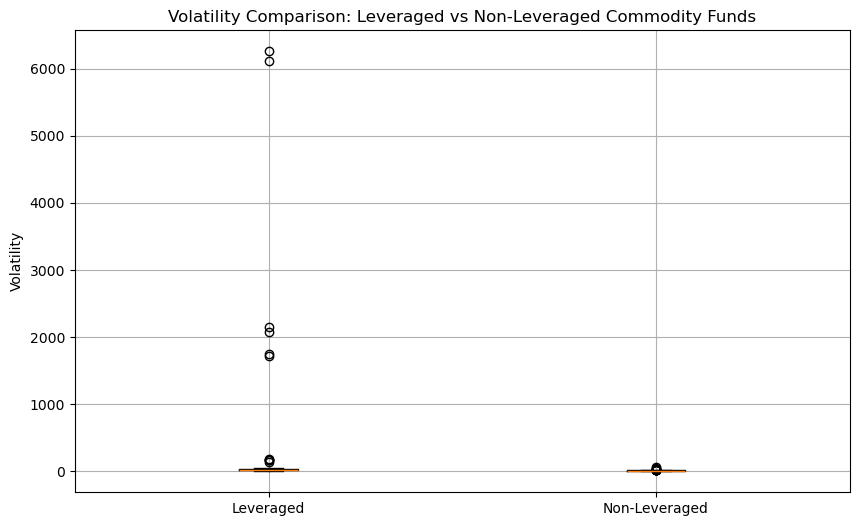

In [47]:
#Fund volatility differentiation
plt.figure(figsize=(10, 6))
plt.boxplot(
    [leveraged_funds['return_volatility'].dropna(), non_leveraged_funds['return_volatility'].dropna()],
    labels=['Leveraged', 'Non-Leveraged']
)
plt.title("Volatility Comparison: Leveraged vs Non-Leveraged Commodity Funds")
plt.ylabel("Volatility")
plt.grid(True)
plt.show()

The boxplot illustrates the stark difference in volatility between leveraged and non-leveraged funds. Leveraged funds exhibit a much wider range and higher median volatility than non-leveraged funds.

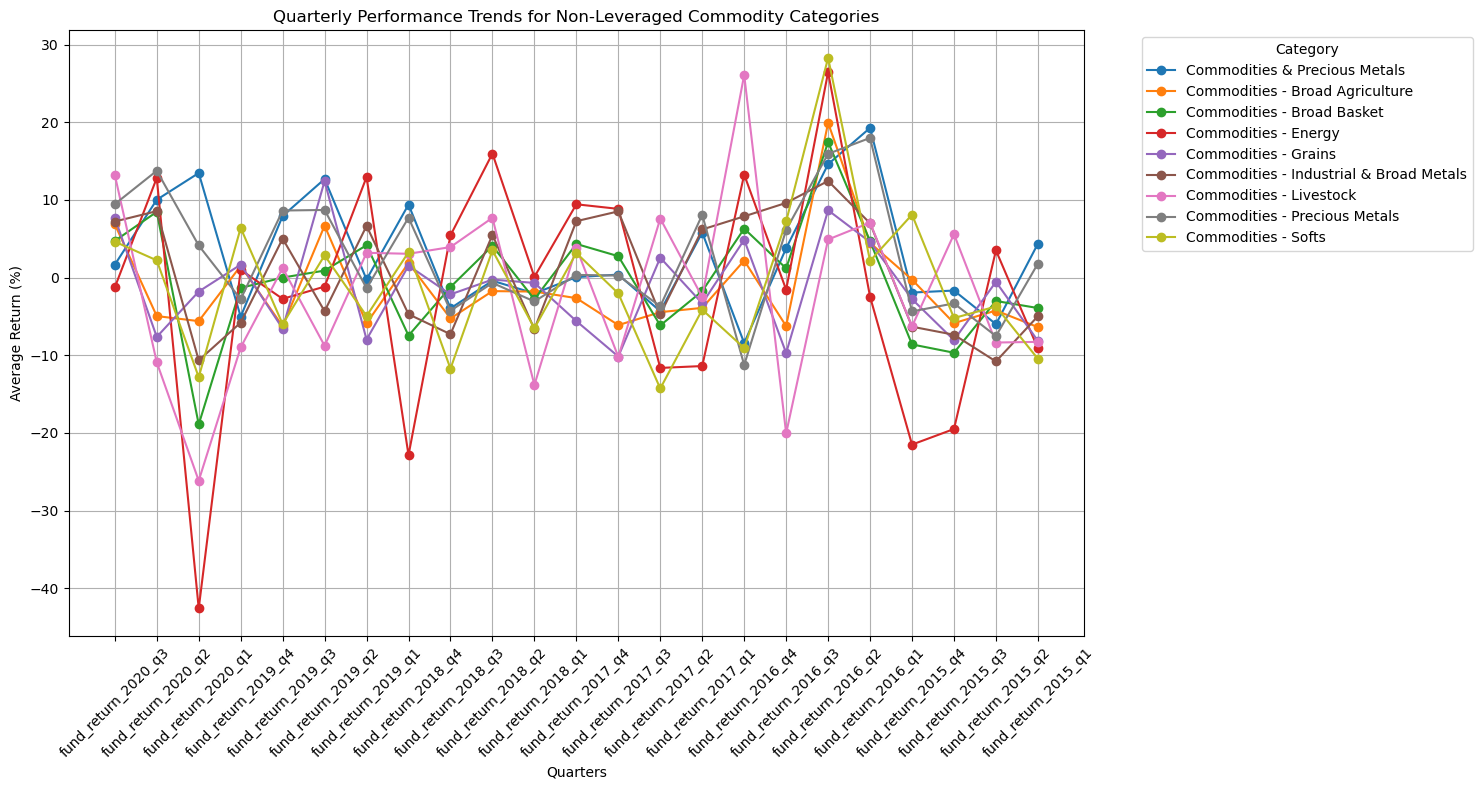

In [50]:
# Previously, we looked at quarterly returns among the different categories.
# Because there are many categories, we'll choose a subset of commodities to examine further
# Extract only non-leveraged commodity categories for focused trend analysis
non_leveraged_commodity_categories = [category for category in etf['category'].unique() if 'Commodities' in str(category) and 'Leveraged/Inverse' not in str(category)]

# Filter the dataset for these categories
non_leveraged_commodities = etf.loc[etf['category'].isin(non_leveraged_commodity_categories)]

# Group by category and calculate average returns for quarterly periods
commodity_trends = non_leveraged_commodities.groupby('category')[q_cols].mean()

# Visualize trends for each non-leveraged commodity category
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for category in commodity_trends.index:
    plt.plot(commodity_trends.columns, commodity_trends.loc[category], marker='o', linestyle='-', label=category)

plt.title("Quarterly Performance Trends for Non-Leveraged Commodity Categories")
plt.xlabel("Quarters")
plt.ylabel("Average Return (%)")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Category")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Identify key insights
commodity_trends_summary = commodity_trends.describe()

In terms of a trend analysis here, we can see that there is
- Consistency: Some categories may show stable returns over time, reflecting lower sensitivity to market volatility.
- Peaks and Troughs: Identify specific quarters where returns significantly spiked or dipped across categories. These fluctuations could indicate global commodity price trends or market events.
- Seasonality: Look for patterns that repeat across specific quarters, which could suggest seasonality in returns due to harvesting cycles, energy demand, or geopolitical factors.

This also includes some commodity specifics, such as:
- Energy Commodities: Historically, energy commodities (e.g., oil, natural gas) show sharp spikes and dips corresponding to geopolitical events or supply-demand imbalances.
- Agricultural Commodities: These may show seasonality due to planting and harvesting cycles, with performance peaking during specific quarters.
- Precious Metals: Gold and silver categories may show countercyclical behavior, performing well during periods of market uncertainty.

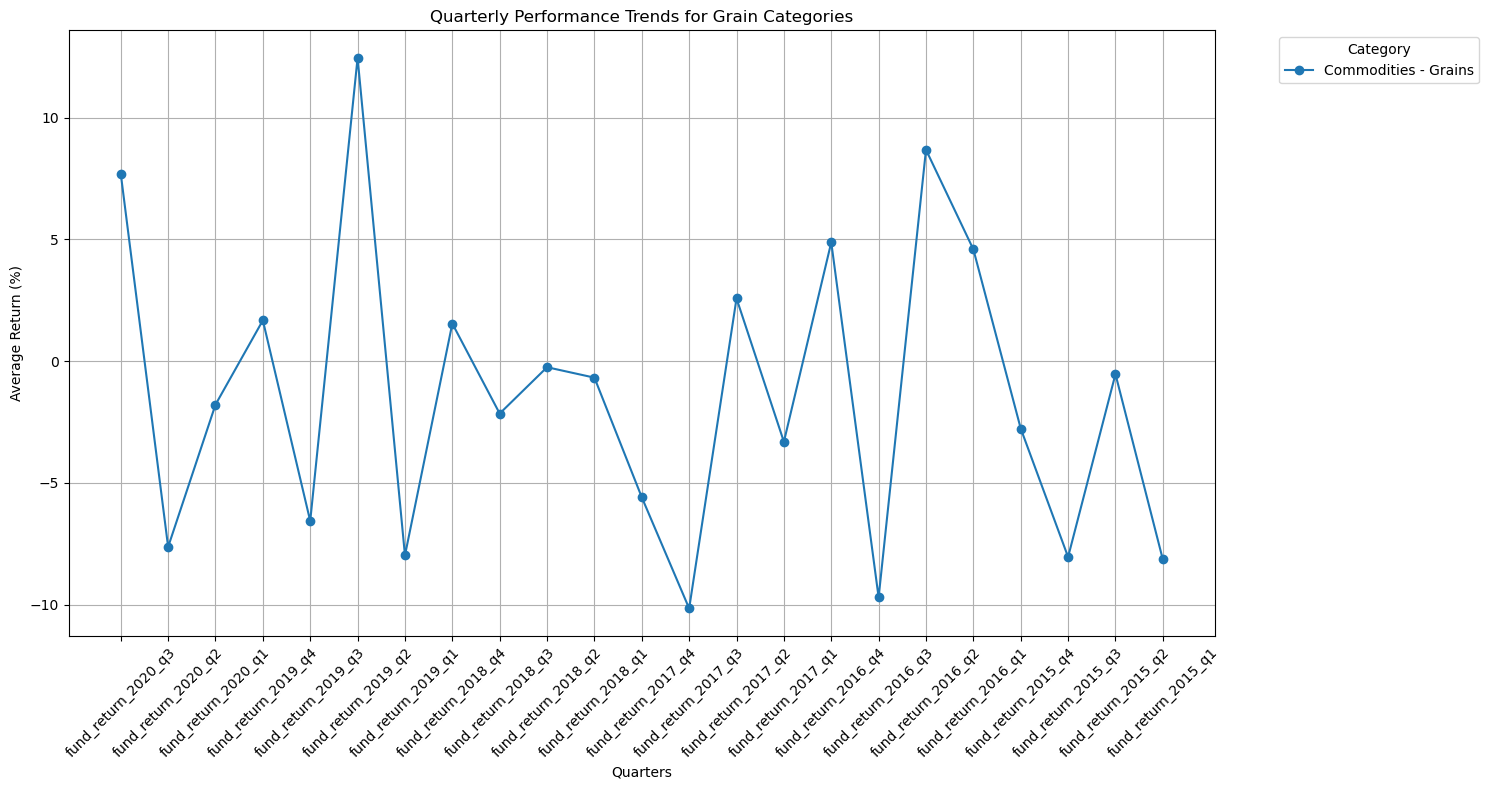

In [53]:
#Looking at grains more in depth
grain_categories = [category for category in non_leveraged_commodity_categories if 'Wheat' in category or 'Corn' in category or 'Grain' in category]

# Filter dataset for grain categories
grain_funds = etf.loc[etf['category'].isin(grain_categories)]

# Group by category and calculate average returns for quarterly periods
grain_trends = grain_funds.groupby('category')[q_cols].mean()

# Visualize trends for grains
plt.figure(figsize=(15, 8))
for category in grain_trends.index:
    plt.plot(grain_trends.columns, grain_trends.loc[category], marker='o', linestyle='-', label=category)

plt.title("Quarterly Performance Trends for Grain Categories")
plt.xlabel("Quarters")
plt.ylabel("Average Return (%)")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Category")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Summary statistics for grains
grain_summary = grain_trends.describe()


### Observations:
Performance Trends: Grain categories show notable variability across quarters, with significant peaks and troughs.
- Q2 2019: Exhibited strong performance with a notable return of 12.45%, potentially reflecting favorable market conditions for grains.
- Q3 2016 and Q1 2019: Sharp declines (-9.70% and -7.98%, respectively) highlight periods of adverse market conditions.

Volatility: Returns exhibit a mix of positive and negative spikes, indicating sensitivity to market events. Specific quarters, such as Q2 2016 (8.68%), show positive returns, aligning with broader recovery trends in commodities.

Insights from Summary Statistics: While some quarters have strong positive returns, the high variability (standard deviations) indicates these gains are not consistent. Negative returns during certain periods suggest susceptibility to market downturns or oversupply.

### Potential Drivers for Observations:
Market Events: Weather patterns, geopolitical issues, and global demand-supply dynamics likely influenced grain markets.
Specific periods (e.g., Q2 2016) may reflect recovery in agricultural markets.

Seasonality: Agricultural commodities often exhibit seasonal trends due to planting and harvesting cycles.

In [232]:
#Clustering Analysis: now, we want to explore potential clusters with these ETFs.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [234]:
numerical_columns = etf.select_dtypes(include=['float64', 'int64']).columns
clustering_data = etf[numerical_columns].dropna()

In [236]:
#Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

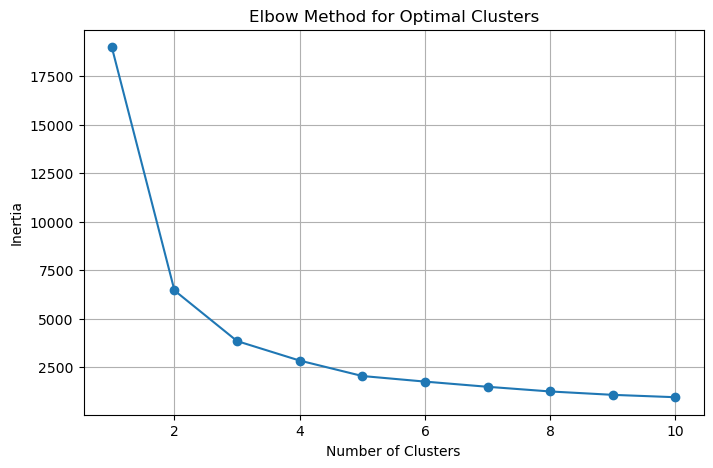

In [238]:
#cluster creation
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [248]:
#Lets use 3 as the optimal number
optimal_clusters = 5
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans_model.fit_predict(clustering_data_scaled)

# Add the cluster labels back to the original data
etf['Cluster'] = clusters

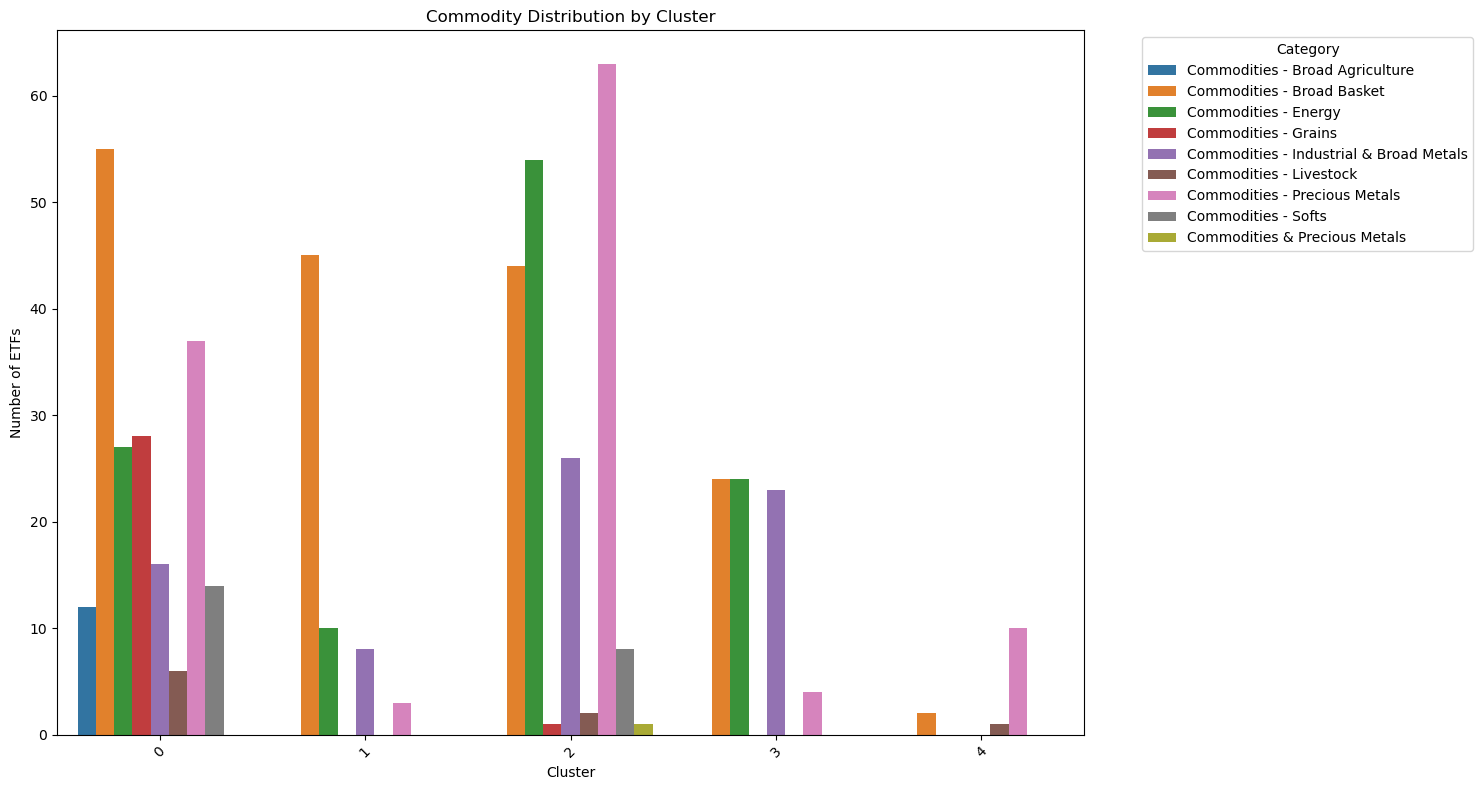

In [256]:
#Understanding the cluster distribution
# Analyze commoditiy distribution within clusters
commodities = ['Commodities & Precious Metals','Commodities - Broad Agriculture','Commodities - Broad Basket','Commodities - Energy','Commodities - Livestock','Commodities - Grains','Commodities - Precious Metals','Commodities - Softs','Commodities - Industrial & Broad Metals']

etf_c = etf[etf['category'].str.contains('|'.join(commodities), na=False)]
category_distribution = etf_c.groupby(['Cluster', 'category']).size().reset_index(name='Count')


# Create a bar chart for category distribution by cluster
plt.figure(figsize=(15, 8))
sns.barplot(data=category_distribution, x='Cluster', y='Count', hue='category', dodge=True)
plt.title("Commodity Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of ETFs")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics for clusters
cluster_summary = etf_c.groupby('Cluster').agg({
    'return_volatility': 'mean', 
    'risk_rating': 'mean',
    'performance_rating': 'mean'
})

Clusters with "Broad Basket" and "Energy" may group ETFs that have diversified exposure to commodity markets or specific focus areas. A cluster with a strong presence of "Precious Metals" ETFs may indicate a focus on hedging and safe-haven assets.

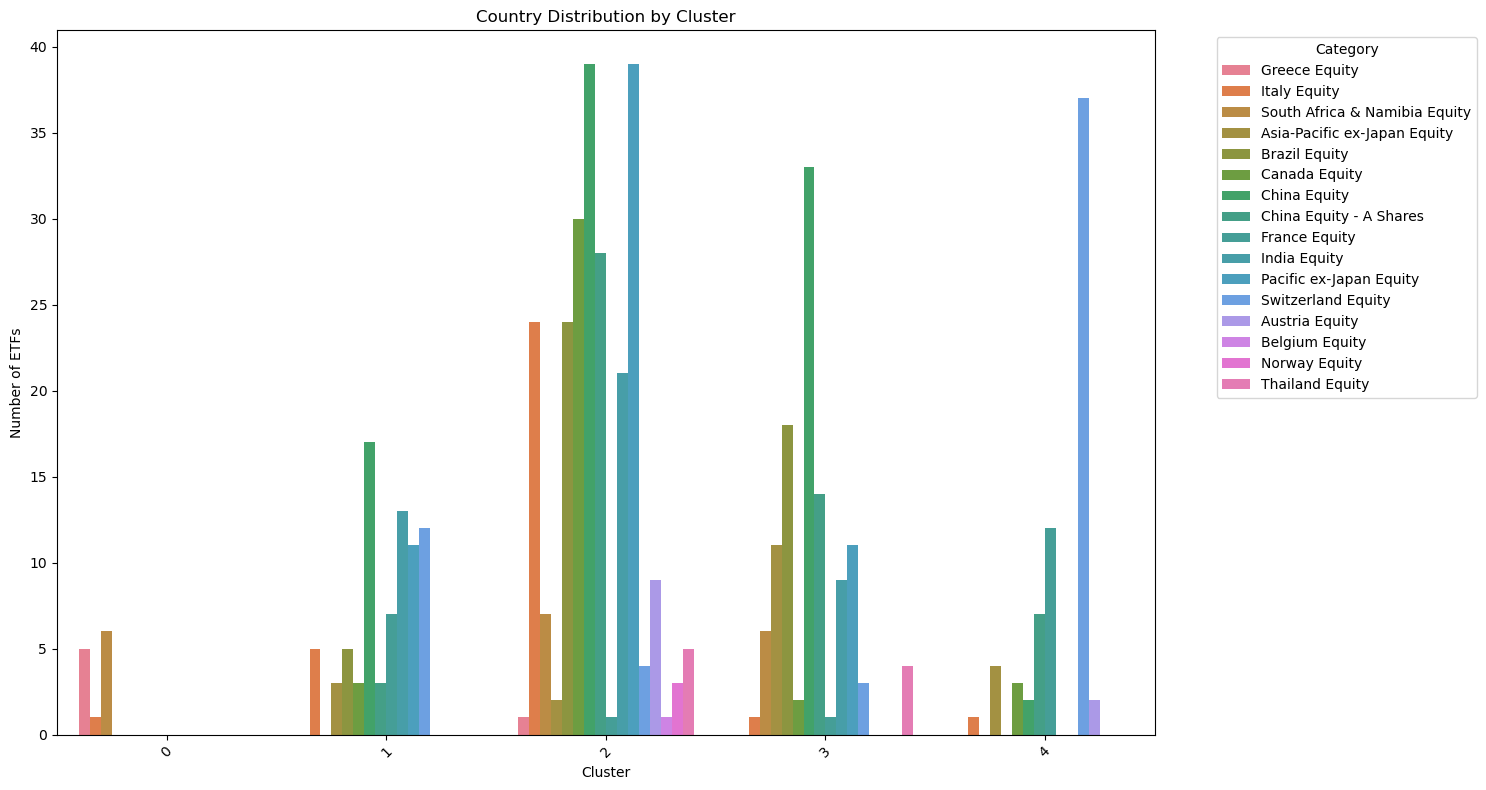

In [258]:
#With some countries
countries = ['Austria Equity','Belgium Equity','Brazil Equity','Canada Equity','China Equity','France Equity','Greece Equity','India Equity','Italy Equity','Norway Equity','Pacific ex-Japan Equity','South Africa & Namibia Equity','Switzerland Equity','Thailand Equity']

etf_d = etf[etf['category'].str.contains('|'.join(countries), na=False)]
category_distribution = etf_d.groupby(['Cluster', 'category']).size().reset_index(name='Count')


# Create a bar chart for category distribution by cluster
plt.figure(figsize=(15, 8))
sns.barplot(data=category_distribution, x='Cluster', y='Count', hue='category', dodge=True)
plt.title("Country Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of ETFs")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Regionally focused clusters might indicate ETFs with similar performance characteristics influenced by geopolitical or macroeconomic trends in those areas. Clusters with mixed country ETFs may represent diversified or globally oriented portfolios.

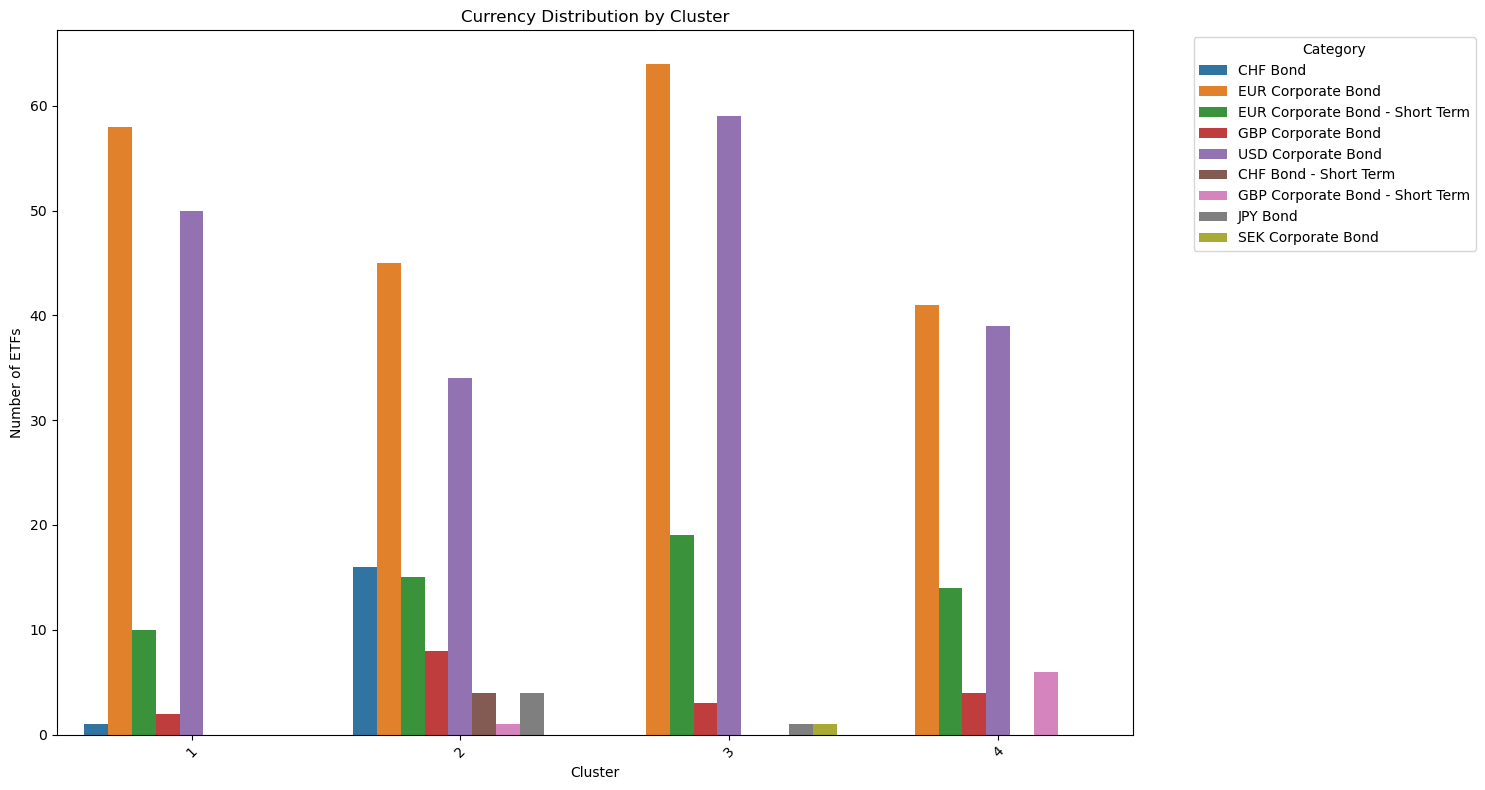

In [260]:
#With currencies
currency = ['CHF Bond','EUR Corporate Bond','GBP Corporate Bond','JPY Bond','SEK Corporate Bond','USD Corporate Bond']

etf_e = etf[etf['category'].str.contains('|'.join(currency), na=False)]
category_distribution = etf_e.groupby(['Cluster', 'category']).size().reset_index(name='Count')


# Create a bar chart for category distribution by cluster
plt.figure(figsize=(15, 8))
sns.barplot(data=category_distribution, x='Cluster', y='Count', hue='category', dodge=True)
plt.title("Currency Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of ETFs")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Clusters with short-term bonds may reflect ETFs aimed at conservative investors prioritizing liquidity.
- Clusters with more exotic or less common bonds (e.g., JPY or SEK Corporate Bonds) could represent niche or specialized investment strategies.

### Collective thoughts on the different clusters:

- Cluster 0: Likely a diversified cluster with exposure to key global markets (commodities, major currencies). May appeal to conservative investors seeking broad, balanced portfolios.
- Cluster 1: Likely a cluster for investors with moderate to high risk tolerance. Combines volatile commodities and emerging market equities with a cushion of stable bonds.
- Cluster 2: Appears to represent a niche cluster focused on agricultural commodities and emerging Asia-Pacific markets. Suitable for investors interested in sectoral or regional opportunities.
- Cluster 3: A balanced cluster appealing to investors seeking exposure to developed markets and stable bonds. Likely targets low-risk, income-focused investors.
- Cluster 4: Represents a highly specialized or niche cluster, focusing on unique bond strategies and limited equity or commodity exposure. Likely suitable for conservative or highly specific investment strategies.

Overall, we can see that between the different clusters, we see:

- Differentiation: Clusters clearly separate broad and niche investment focuses, with some emphasizing specific commodities (e.g., Cluster 2) or bond types (e.g., Cluster 4).
- Risk Profiles: Clusters with emerging markets and volatile commodities (e.g., Cluster 1, Cluster 2) suggest higher-risk opportunities. Clusters with developed markets and stable bonds (e.g., Cluster 3) cater to conservative investors.
- Specialization: Niche clusters (e.g., Cluster 4) reflect specialized strategies, while diversified clusters (e.g., Cluster 0) provide balanced exposure.

These different points when applied to stocks could ultimately be a part of the recipie that leads to the creation of a new ETF.